<a href="https://colab.research.google.com/github/ArindamBanerji/feature-eng-eda-recipes/blob/main/tf_load_data_expts_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import layers

In [2]:
abalone_train = pd.read_csv(
    "https://storage.googleapis.com/download.tensorflow.org/data/abalone_train.csv",
    names=["Length", "Diameter", "Height", "Whole weight", "Shucked weight",
           "Viscera weight", "Shell weight", "Age"])

abalone_train.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0.435,0.335,0.110,0.334,0.1355,0.0775,0.0965,7
1,0.585,0.450,0.125,0.874,0.3545,0.2075,0.2250,6
2,0.655,0.510,0.160,1.092,0.3960,0.2825,0.3700,14
3,0.545,0.425,0.125,0.768,0.2940,0.1495,0.2600,16
4,0.545,0.420,0.130,0.879,0.3740,0.1695,0.2300,13


In [3]:
abalone_features = abalone_train.copy()
abalone_labels = abalone_features.pop('Age')

In [4]:
print (abalone_labels)

0        7
1        6
2       14
3       16
4       13
        ..
3315    15
3316    10
3317    11
3318    16
3319    19
Name: Age, Length: 3320, dtype: int64


In [5]:
abalone_features = np.array(abalone_features)
abalone_features

array([[0.435, 0.335, 0.11 , ..., 0.136, 0.077, 0.097],
       [0.585, 0.45 , 0.125, ..., 0.354, 0.207, 0.225],
       [0.655, 0.51 , 0.16 , ..., 0.396, 0.282, 0.37 ],
       ...,
       [0.53 , 0.42 , 0.13 , ..., 0.374, 0.167, 0.249],
       [0.395, 0.315, 0.105, ..., 0.118, 0.091, 0.119],
       [0.45 , 0.355, 0.12 , ..., 0.115, 0.067, 0.16 ]])

In [6]:
abalone_model = tf.keras.Sequential([
  layers.Dense(64),
  layers.Dense(1)
])

abalone_model.compile(loss = tf.keras.losses.MeanSquaredError(),
                      optimizer = tf.keras.optimizers.Adam())

In [7]:
normalize = layers.Normalization()

In [8]:
normalize.adapt(abalone_features)

In [9]:
norm_abalone_model = tf.keras.Sequential([
  normalize,
  layers.Dense(64),
  layers.Dense(1)
])

norm_abalone_model.compile(loss = tf.keras.losses.MeanSquaredError(),
                           optimizer = tf.keras.optimizers.Adam())

norm_abalone_model.fit(abalone_features, abalone_labels, epochs=10)

Epoch 1/10
104/104 [==============================] - 1s 6ms/step - loss: 92.0257
Epoch 2/10
104/104 [==============================] - 0s 4ms/step - loss: 52.6812
Epoch 3/10
104/104 [==============================] - 0s 4ms/step - loss: 16.0719
Epoch 4/10
104/104 [==============================] - 0s 4ms/step - loss: 5.7836
Epoch 5/10
104/104 [==============================] - 1s 6ms/step - loss: 5.0698
Epoch 6/10
104/104 [==============================] - 0s 5ms/step - loss: 4.9901
Epoch 7/10
104/104 [==============================] - 0s 4ms/step - loss: 4.9575
Epoch 8/10
104/104 [==============================] - 1s 6ms/step - loss: 4.9596
Epoch 9/10
104/104 [==============================] - 1s 5ms/step - loss: 4.9534
Epoch 10/10
104/104 [==============================] - 0s 4ms/step - loss: 4.9232


In [10]:
titanic = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/train.csv")
titanic.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [11]:
titanic_features = titanic.copy()
titanic_labels = titanic_features.pop('survived')

In [12]:
# Create a symbolic input
input = tf.keras.Input(shape=(), dtype=tf.float32)

# Perform a calculation using the input
result = 2*input + 1

# the result doesn't have a value
result

<KerasTensor: shape=(None,) dtype=float32 (created by layer 'tf.__operators__.add')>

In [13]:
calc = tf.keras.Model(inputs=input, outputs=result)

In [14]:
print(calc(1).numpy())
print(calc(2).numpy())

3.0
5.0


In [15]:
# create a structure to deal w/individual columns separately

inputs = {}

for name, column in titanic_features.items():
  dtype = column.dtype
  if dtype == object:
    dtype = tf.string
  else:
    dtype = tf.float32

  inputs[name] = tf.keras.Input(shape=(1,), name=name, dtype=dtype)

inputs

{'sex': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'sex')>,
 'age': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'age')>,
 'n_siblings_spouses': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'n_siblings_spouses')>,
 'parch': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'parch')>,
 'fare': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'fare')>,
 'class': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'class')>,
 'deck': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'deck')>,
 'embark_town': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'embark_town')>,
 'alone': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'alone')>}

In [18]:
## cooncatenat & normalize the numeric inputs first ...

numeric_inputs = {name:input for name,input in inputs.items()
                  if input.dtype==tf.float32}

print (len(numeric_inputs))
print (numeric_inputs)

x = layers.Concatenate()(list(numeric_inputs.values()))
norm = layers.Normalization()
norm.adapt(np.array(titanic[numeric_inputs.keys()]))
all_numeric_inputs = norm(x)

all_numeric_inputs

4
{'age': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'age')>, 'n_siblings_spouses': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'n_siblings_spouses')>, 'parch': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'parch')>, 'fare': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'fare')>}


<KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'normalization_3')>

In [20]:
print (all_numeric_inputs)

KerasTensor(type_spec=TensorSpec(shape=(None, 4), dtype=tf.float32, name=None), name='normalization_3/truediv:0', description="created by layer 'normalization_3'")


In [22]:
preprocessed_inputs = [all_numeric_inputs]

In [24]:
print (preprocessed_inputs)

[<KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'normalization_3')>]


In [25]:
for name, input in inputs.items():
  if input.dtype == tf.float32:
    continue
  
  lookup = layers.StringLookup(vocabulary=np.unique(titanic_features[name]))
  one_hot = layers.CategoryEncoding(num_tokens=lookup.vocabulary_size())

  x = lookup(input)
  x = one_hot(x)
  preprocessed_inputs.append(x)

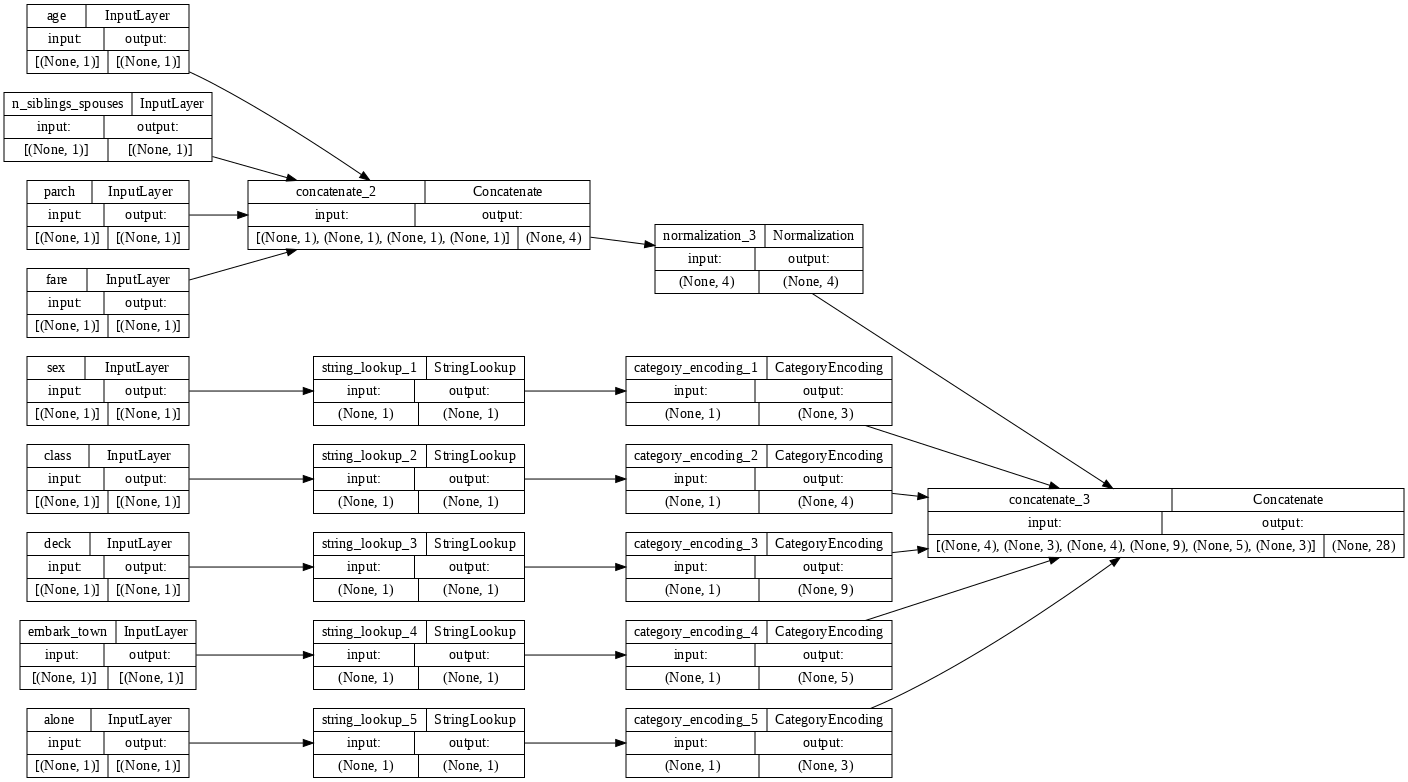

In [26]:
preprocessed_inputs_cat = layers.Concatenate()(preprocessed_inputs)

titanic_preprocessing = tf.keras.Model(inputs, preprocessed_inputs_cat)

tf.keras.utils.plot_model(model = titanic_preprocessing , 
                          rankdir="LR", dpi=72, show_shapes=True)

In [28]:
titanic_features_dict = {name: np.array(value) 
                         for name, value in titanic_features.items()}

In [30]:
print (len(titanic_features_dict))

9


In [32]:
# first ttraining example - preprocess it using above

features_dict = {name:values[:1] for name, values in titanic_features_dict.items()}
titanic_preprocessing(features_dict)

<tf.Tensor: shape=(1, 28), dtype=float32, numpy=
array([[-0.61 ,  0.395, -0.479, -0.497,  0.   ,  0.   ,  1.   ,  0.   ,
         0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  1.   ,
         0.   ,  0.   ,  1.   ,  0.   ]], dtype=float32)>

In [33]:
def titanic_model(preprocessing_head, inputs):
  body = tf.keras.Sequential([
    layers.Dense(64),
    layers.Dense(1)
  ])

  preprocessed_inputs = preprocessing_head(inputs)
  result = body(preprocessed_inputs)
  model = tf.keras.Model(inputs, result)

  model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                optimizer=tf.keras.optimizers.Adam())
  return model

titanic_model = titanic_model(titanic_preprocessing, inputs)

In [34]:
titanic_model.fit(x=titanic_features_dict, y=titanic_labels, epochs=10)

Epoch 1/10
20/20 [==============================] - 1s 4ms/step - loss: 0.6956
Epoch 2/10
20/20 [==============================] - 0s 4ms/step - loss: 0.5565
Epoch 3/10
20/20 [==============================] - 0s 4ms/step - loss: 0.4972
Epoch 4/10
20/20 [==============================] - 0s 4ms/step - loss: 0.4680
Epoch 5/10
20/20 [==============================] - 0s 4ms/step - loss: 0.4503
Epoch 6/10
20/20 [==============================] - 0s 3ms/step - loss: 0.4406
Epoch 7/10
20/20 [==============================] - 0s 4ms/step - loss: 0.4319
Epoch 8/10
20/20 [==============================] - 0s 4ms/step - loss: 0.4271
Epoch 9/10
20/20 [==============================] - 0s 4ms/step - loss: 0.4254
Epoch 10/10
20/20 [==============================] - 0s 3ms/step - loss: 0.4232


In [35]:
titanic_model.save('test')
reloaded = tf.keras.models.load_model('test')

In [36]:
features_dict = {name:values[:1] for name, values in titanic_features_dict.items()}

before = titanic_model(features_dict)
after = reloaded(features_dict)
assert (before-after)<1e-3
print(before)
print(after)

tf.Tensor([[-1.763]], shape=(1, 1), dtype=float32)
tf.Tensor([[-1.763]], shape=(1, 1), dtype=float32)
